## Breast-Cancer-Classification

This assignment is about Feature Engineering with Logistic Regression. To begin, you'll need to create code that loads in the data(the file data.csv is found in the one-drive assignments folder under a3 directory) and builds a Logistic regression model to classify the breast cancer tumor type ; Malignant(M) as +ve class and Benign as -ve class and output the predictions in a CSV format.

Explore different features for your regression model. And compare the model performance using different features.
Create plots to show model performance and perform error analysis to understand how your model is performing.
The process you explore will be reflected in your write-up, but your code must reproduce your output for us to recreate your results.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest 
from sklearn.datasets import make_classification
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,f1_score
from sklearn import metrics

## Data Exploration

In [2]:
# loads in the data
df = pd.read_csv('data.csv')
df.isnull().sum() #check if there is missing data

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Observation:
Ofther than the Unnamed data, there is no missing data.

In [3]:
df.head()
df = df.fillna(0)
df.drop('Unnamed: 32',axis=1,inplace=True)
df.drop('id',axis=1,inplace=True)
#converting the data into catergorical
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
#df=df.replace({'diagnosis':{'M':1,'B':0}})

In [4]:
df.describe() #explore data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.shape

(569, 31)

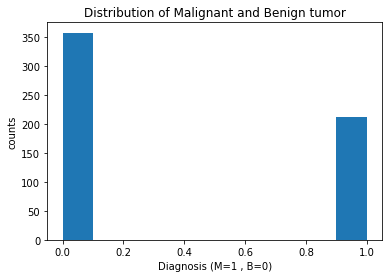

0    357
1    212
Name: diagnosis, dtype: int64


In [6]:
count = df['diagnosis'].value_counts()
plt.hist(df['diagnosis'])
plt.xlabel('Diagnosis (M=1 , B=0)')
plt.ylabel('counts')
plt.title('Distribution of Malignant and Benign tumor')
plt.show()
print(count)

#### Observations:
From the plot above we can tell that Benign class has a bigger amount compare to Malignant class in the dataset.

#### Target class
Our main goal is to correctly predict on the basis of the dataset, if the breast cancer is 
 #### - Malignant(1) i.e. Positive
 #### - Benign(0) i.e. Negative
Hence our target class is diagnosis

##  Feature selection

In [7]:
#see what features we have 
df.columns.values

array(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

<AxesSubplot:>

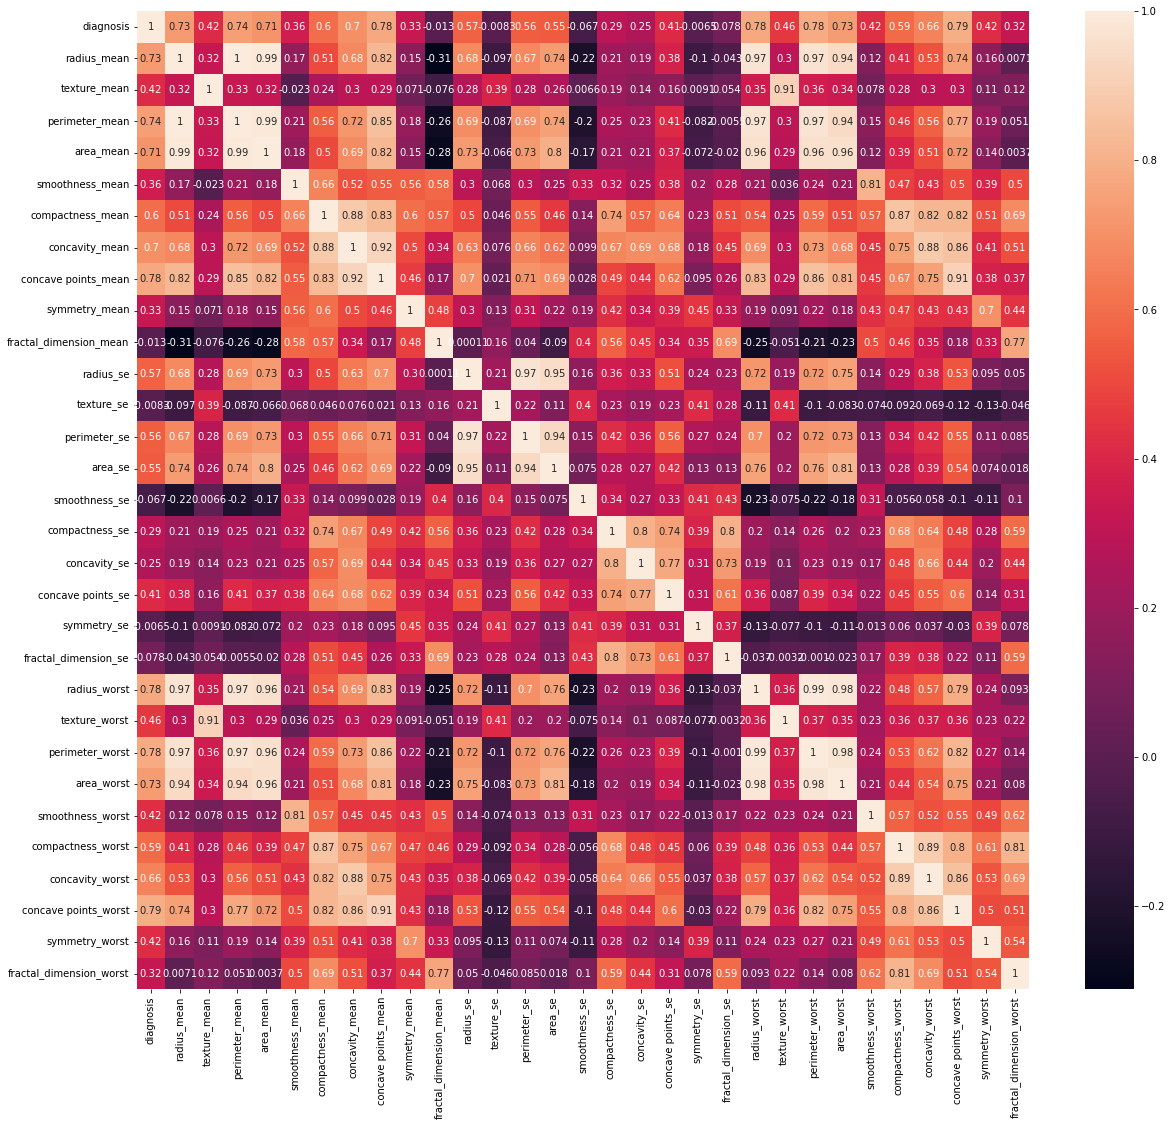

In [8]:
#show the correlations between all the features
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True)

#### Observations:
From the heat map, we can observe the correlations between the features and the diagnosis.

#### Correlations according to mean, SE, worstate the data in mean, SE, worst for analysis

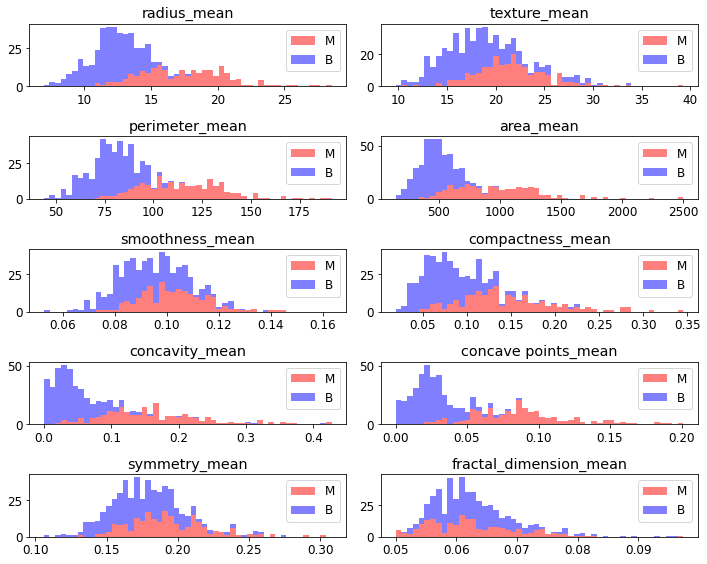

In [9]:
#correlations between mean features
dfM = df[df['diagnosis']==1]
dfB = df[df['diagnosis']==0]

#stack the data
plt.rcParams.update({'font.size':12})
fig,axes = plt.subplots(nrows=5, ncols=2, figsize=(10,8))
axes = axes.ravel()

features_mean = list(df.columns[1:11])
for idx, ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','b'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

<AxesSubplot:>

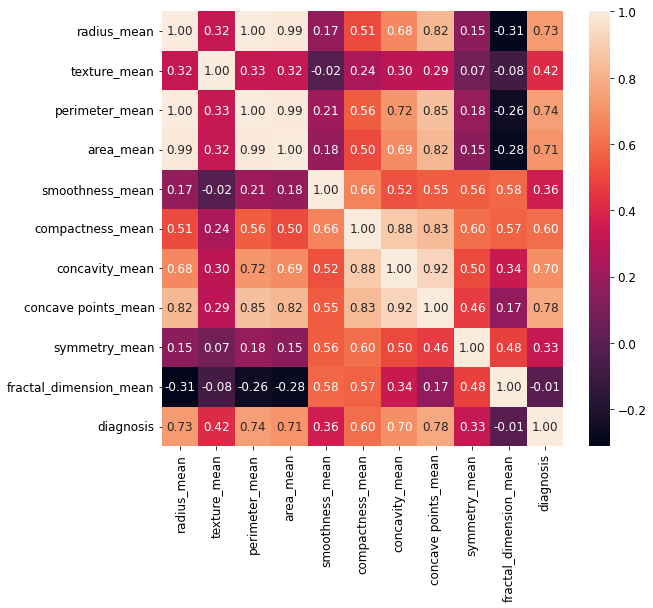

In [10]:
#another method to show the correlations between mean features
df_mean = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean','diagnosis']]
cor = df_mean.corr() #Calculate the correlation of the above variables
f,ax = plt.subplots(figsize=(9, 8))
sns.heatmap(cor,annot=True,fmt= '.2f', ax=ax) #Plot the correlation as heat map

<AxesSubplot:>

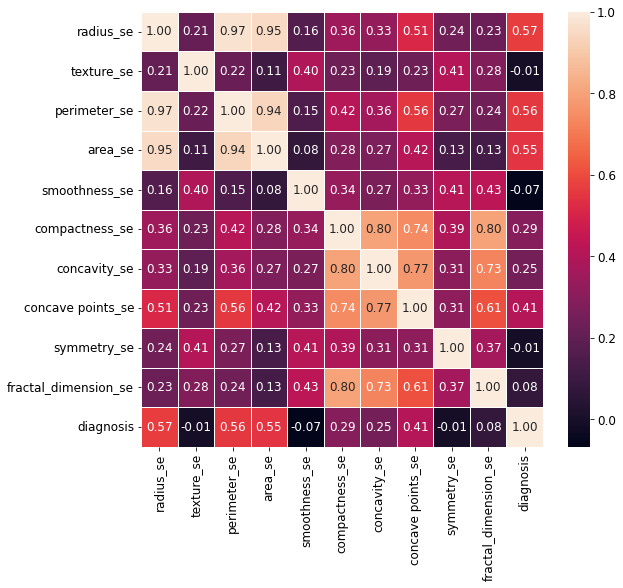

In [11]:
#correlations between SE features
df_SE = df[['radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se','diagnosis']]
cor = df_SE.corr() #Calculate the correlation of the above variables
f,ax = plt.subplots(figsize=(9, 8))
sns.heatmap(cor,annot=True, linewidths=.5, fmt= '.2f',ax=ax)
#Plot the correlation as heat map

<AxesSubplot:>

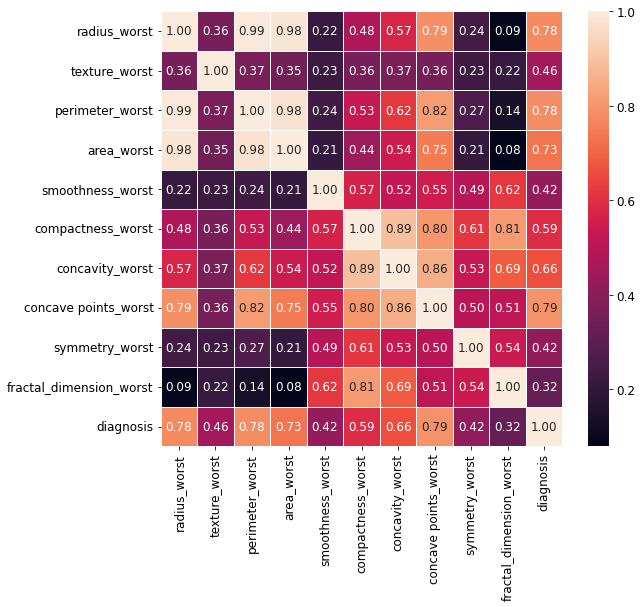

In [12]:
#correlations between worst features
df_worst = df[['radius_worst','texture_worst','perimeter_worst','area_worst',
      'smoothness_worst','compactness_worst','concavity_worst',
      'concave points_worst','symmetry_worst','fractal_dimension_worst','diagnosis']]
cor = df_worst.corr() #Calculate the correlation of the above variables
f,ax = plt.subplots(figsize=(9, 8))
sns.heatmap(cor,annot=True, linewidths=.5, fmt= '.2f',ax=ax) 
#Plot the correlation as heat map

#### Observations:
**-features that could be used in classification of the cancer (lets use the ones which have correlation coefficient>0.7):**

1.feature_means:

radius_mean,perimeter_mean,area_mean,concave points_mean

2.feature_worst:

radius_worst,perimeter_worst,area_worst,concave points_worst

**-features that does not show a particular preference of one diagnosis over the other:**
texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,compactness_mean,concavity_mean,radius_se,perimeter_se,area_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,texture_worst,smoothness_worst,symmetry_worst,fractal_dimension_worst,compactness_worst,concavity_worst

## Standardize our data, perform our train/test split, then develop Logistic Regression Models

## No Feature Engineering

### 1. use all features
Our classifier is first trained on the train set and then test on the test set. I used a 70:30  split, assumed it ideal ratio between training and testing.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['diagnosis']),df['diagnosis'], 
                                                    test_size=0.3, random_state=45)
# Then further divide the test set in 50:50 ratio into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=45)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (398, 30)
y_train shape:  (398,)
X_test shape:  (85, 30)
y_test shape:  (85,)


In [14]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_val = ss.fit_transform(X_val)

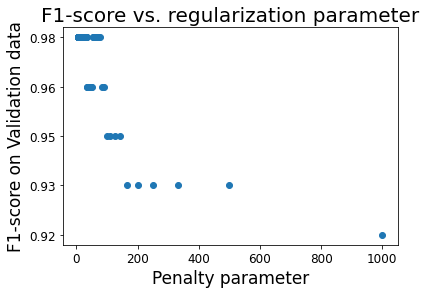

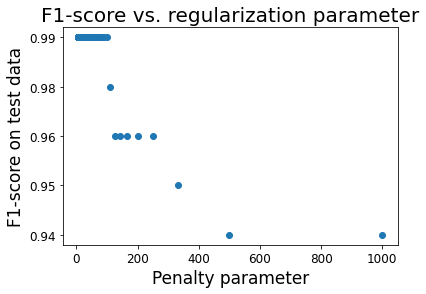

In [15]:
# validation
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
val_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        val_predictions[i] = logmodel[i].predict(X_val)
        class_report[i] = classification_report(y_val,val_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on Validation data",fontsize=17)
plt.show()

# testing
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
test_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        test_predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,test_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

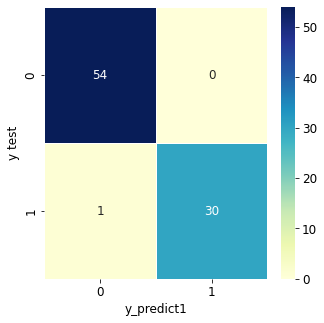

Confusion Matrix: 
 [[54  0]
 [ 1 30]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.97      0.98        31

    accuracy                           0.99        85
   macro avg       0.99      0.98      0.99        85
weighted avg       0.99      0.99      0.99        85

Accuracy of the Logistic Regression Model is: 0.9882352941176471


In [16]:
y_predict1 = logmodel[200].predict(X_test) # We predict target values
logmodel_cm= confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logmodel_cm, annot= True, linewidth= 0.5, 
            fmt='d',cmap='YlGnBu')
plt.xlabel('y_predict1')
plt.ylabel('y test')
plt.show()
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predict1))
print('\n')
print(classification_report(y_test,y_predict1))
logreg_acc1= accuracy_score(y_test, y_predict1) #Test score
print('Accuracy of the Logistic Regression Model is:', logreg_acc1)

From the confusion matrix above, we can see that 54 Benign tumors and 30 Malignant tumors were accurately predicted, 1 tumor was presenting a faulty predictions.

### Error Analysis Using ROC and AUC

Randomized Predictions: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.998


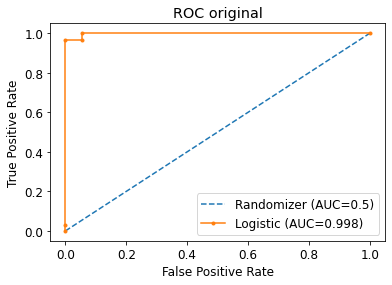

In [17]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities using last model
lr_probs = logmodel[200].predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Randomized Predictions: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Randomizer (AUC={})'.format(ns_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC={})'.format(round(lr_auc,3)))
# axis labels
plt.title("ROC original")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Feature Engineering

### 2.use only 'mean' related features: 
radius_mean,perimeter_mean,area_mean,compactness_mean,concavity_mean,concave points_mean

In [18]:
prediction_feature2 = ['radius_mean','perimeter_mean','area_mean','compactness_mean',
                       'concavity_mean','concave points_mean']
X_train, X_test, y_train, y_test = train_test_split(df[prediction_feature2] ,df['diagnosis'], 
                                                    test_size=0.3, random_state=45)
# Then further divide the test set in 50:50 ratio into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=45)

In [19]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_val = ss.fit_transform(X_val)

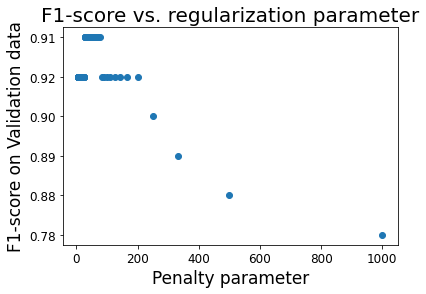

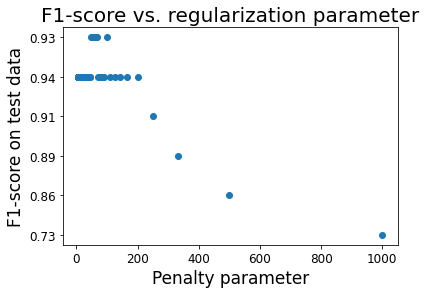

In [20]:
# validation
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
val_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        val_predictions[i] = logmodel[i].predict(X_val)
        class_report[i] = classification_report(y_val,val_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on Validation data",fontsize=17)
plt.show()

# testing
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
test_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        test_predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,test_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

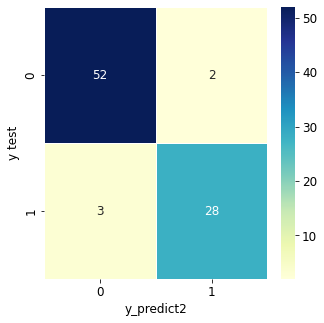

Confusion Matrix: 
 [[52  2]
 [ 3 28]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.93      0.90      0.92        31

    accuracy                           0.94        85
   macro avg       0.94      0.93      0.94        85
weighted avg       0.94      0.94      0.94        85

Accuracy of the Logistic Regression Model is: 0.9411764705882353


In [21]:
y_predict2 = logmodel[200].predict(X_test) # We predict target values
logmodel_cm= confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logmodel_cm, annot= True, linewidth= 0.5, 
            fmt='d',cmap='YlGnBu')
plt.xlabel('y_predict2')
plt.ylabel('y test')
plt.show()
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predict2))
print('\n')
print(classification_report(y_test,y_predict2))
logreg_acc2= accuracy_score(y_test, y_predict2) #Test score
print('Accuracy of the Logistic Regression Model is:', logreg_acc2)

We can see that the Model Accuracy is lower than the previous one.

### Error Analysis Using ROC and AUC

Randomized Predictions: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.986


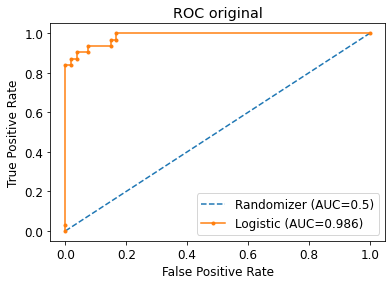

In [22]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities using last model
lr_probs = logmodel[200].predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Randomized Predictions: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Randomizer (AUC={})'.format(ns_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC={})'.format(round(lr_auc,3)))
# axis labels
plt.title("ROC original")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### 3.use only 'worst' related features: 
radius_worst,perimeter_worst,area_worst,compactness_worst,concavity_worst,concave points_worst

In [23]:
prediction_feature3 = ['radius_worst','perimeter_worst','area_worst',
                       'compactness_worst','concavity_worst','concave points_worst']
X_train, X_test, y_train, y_test = train_test_split(df[prediction_feature3] ,df['diagnosis'], 
                                                    test_size=0.3, random_state=45)
# Then further divide the test set in 50:50 ratio into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=45)

In [24]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_val = ss.fit_transform(X_val)

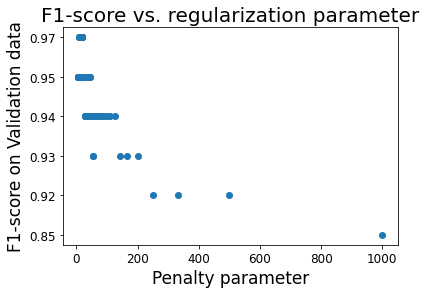

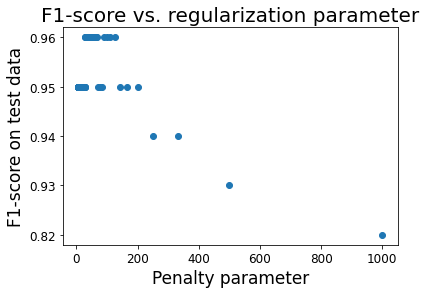

In [25]:
# validation
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
val_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        val_predictions[i] = logmodel[i].predict(X_val)
        class_report[i] = classification_report(y_val,val_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on Validation data",fontsize=17)
plt.show()

# testing
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
test_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        test_predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,test_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

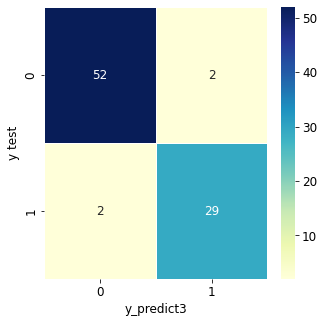

Confusion Matrix: 
 [[52  2]
 [ 2 29]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.94      0.94      0.94        31

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85

Accuracy of the Logistic Regression Model is: 0.9529411764705882


In [26]:
y_predict3 = logmodel[200].predict(X_test) # We predict target values
logmodel_cm= confusion_matrix(y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logmodel_cm, annot= True, linewidth= 0.5, 
            fmt='d',cmap='YlGnBu')
plt.xlabel('y_predict3')
plt.ylabel('y test')
plt.show()
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predict3))
print('\n')
print(classification_report(y_test,y_predict3))
logreg_acc3= accuracy_score(y_test, y_predict3) #Test score
print('Accuracy of the Logistic Regression Model is:', logreg_acc3)

### Error Analysis Using ROC and AUC

Randomized Predictions: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.981


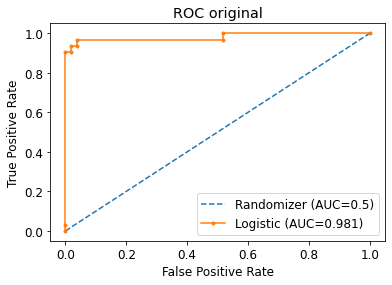

In [27]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities using last model
lr_probs = logmodel[200].predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Randomized Predictions: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Randomizer (AUC={})'.format(ns_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC={})'.format(round(lr_auc,3)))
# axis labels
plt.title("ROC original")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### 4.use all the features which have correlation coefficient>0.7 with the 'diagnosis'.

In [28]:
corr=df.corr()
corr[abs(corr['diagnosis'])>0.7].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')

In [29]:
prediction_feature4 = ['radius_mean','perimeter_mean','area_mean','concave points_mean','radius_worst','perimeter_worst',
                       'area_worst','concave points_worst']
X_train, X_test, y_train, y_test = train_test_split(df[prediction_feature4] ,df['diagnosis'], 
                                                    test_size=0.3, random_state=45)
# Then further divide the test set in 50:50 ratio into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=45)

In [30]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_val = ss.fit_transform(X_val)

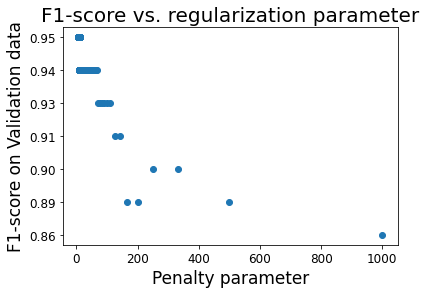

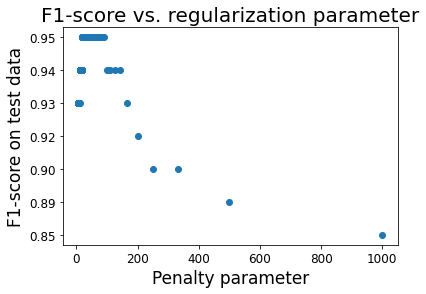

In [31]:
# validation
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
val_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        val_predictions[i] = logmodel[i].predict(X_val)
        class_report[i] = classification_report(y_val,val_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on Validation data",fontsize=17)
plt.show()

# testing
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
test_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        test_predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,test_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

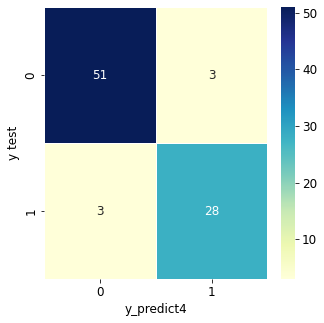

Confusion Matrix: 
 [[51  3]
 [ 3 28]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.90      0.90      0.90        31

    accuracy                           0.93        85
   macro avg       0.92      0.92      0.92        85
weighted avg       0.93      0.93      0.93        85

Accuracy of the Logistic Regression Model is: 0.9294117647058824


In [32]:
y_predict4 = logmodel[200].predict(X_test) # We predict target values
logmodel_cm= confusion_matrix(y_test, y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logmodel_cm, annot= True, linewidth= 0.5, 
            fmt='d',cmap='YlGnBu')
plt.xlabel('y_predict4')
plt.ylabel('y test')
plt.show()
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predict4))
print('\n')
print(classification_report(y_test,y_predict4))
logreg_acc4= accuracy_score(y_test, y_predict4) #Test score
print('Accuracy of the Logistic Regression Model is:', logreg_acc4)

### Error Analysis Using ROC and AUC

Randomized Predictions: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.983


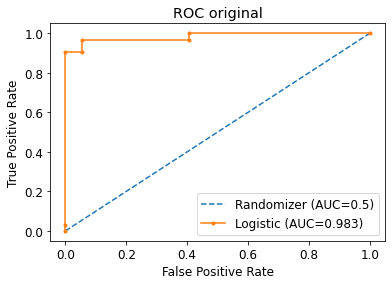

In [33]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities using last model
lr_probs = logmodel[200].predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Randomized Predictions: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Randomizer (AUC={})'.format(ns_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC={})'.format(round(lr_auc,3)))
# axis labels
plt.title("ROC original")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### 5. apply SelectKBest class to extract top 10 best features

In [34]:
X = df.drop(columns = ['diagnosis'],axis=1)
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,df['diagnosis'])
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [35]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

              Specs          Score
23       area_worst  112598.431564
3         area_mean   53991.655924
13          area_se    8758.504705
22  perimeter_worst    3665.035416
2    perimeter_mean    2011.102864
20     radius_worst     491.689157
0       radius_mean     266.104917
12     perimeter_se     250.571896
21    texture_worst     174.449400
1      texture_mean      93.897508


Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


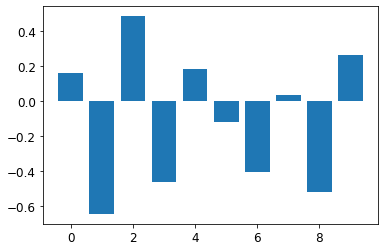

In [36]:
# Logistic regression for feature importance
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [37]:
#use the top 10 features to train
prediction_feature5 = ['area_worst','area_mean','area_se','perimeter_worst','perimeter_mean'
                       ,'radius_worst','radius_mean','perimeter_se','texture_worst','texture_mean']
X_train, X_test, y_train, y_test = train_test_split(df[prediction_feature5] ,df['diagnosis'], 
                                                    test_size=0.3, random_state=45)
# Then further divide the test set in 50:50 ratio into validation set and test set
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50, random_state=45)

In [38]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)
X_val = ss.fit_transform(X_val)

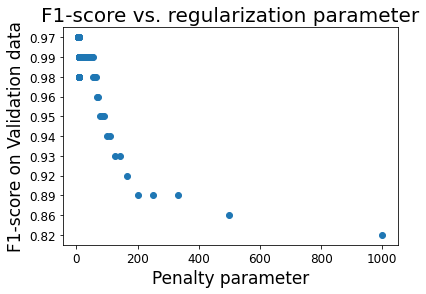

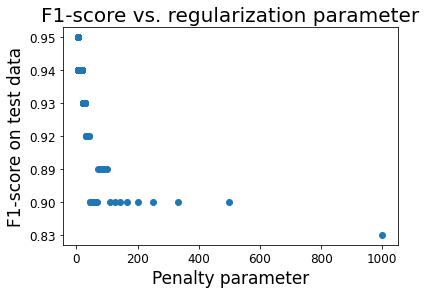

In [39]:
# validation
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
val_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        val_predictions[i] = logmodel[i].predict(X_val)
        class_report[i] = classification_report(y_val,val_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on Validation data",fontsize=17)
plt.show()

# testing
nsimu=201
penalty=[0]*nsimu
logmodel=[0]*nsimu
test_predictions =[0]*nsimu
class_report = [0]*nsimu
f1=[0]*nsimu

for i in range(1,nsimu):
        logmodel[i] =(LogisticRegression(C=i/1000,tol=1e-4, max_iter=100,n_jobs=4))
        logmodel[i].fit(X_train,y_train)
        test_predictions[i] = logmodel[i].predict(X_test)
        class_report[i] = classification_report(y_test,test_predictions[i])
        l=class_report[i].split()
        f1[i] = l[len(l)-2]
        penalty[i]=1000/i

plt.scatter(penalty[1:len(penalty)-2],f1[1:len(f1)-2])
plt.title("F1-score vs. regularization parameter",fontsize=20)
plt.xlabel("Penalty parameter",fontsize=17)
plt.ylabel("F1-score on test data",fontsize=17)
plt.show()

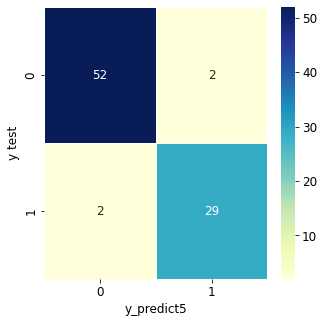

Confusion Matrix: 
 [[52  2]
 [ 2 29]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.94      0.94      0.94        31

    accuracy                           0.95        85
   macro avg       0.95      0.95      0.95        85
weighted avg       0.95      0.95      0.95        85

Accuracy of the Logistic Regression Model is: 0.9529411764705882


In [40]:
y_predict5 = logmodel[200].predict(X_test) # We predict target values
logmodel_cm= confusion_matrix(y_test, y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logmodel_cm, annot= True, linewidth= 0.5, 
            fmt='d',cmap='YlGnBu')
plt.xlabel('y_predict5')
plt.ylabel('y test')
plt.show()
print('Confusion Matrix: \n', confusion_matrix(y_test,y_predict5))
print('\n')
print(classification_report(y_test,y_predict5))
logreg_acc5= accuracy_score(y_test, y_predict5) #Test score
print('Accuracy of the Logistic Regression Model is:', logreg_acc5)

### Error Analysis Using ROC and AUC

Randomized Predictions: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.989


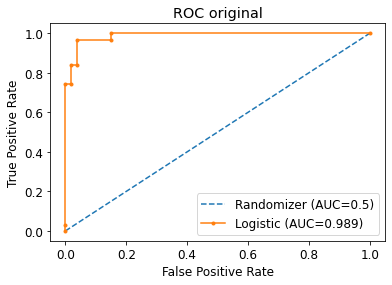

In [42]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities using last model
lr_probs = logmodel[200].predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Randomized Predictions: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Randomizer (AUC={})'.format(ns_auc))
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC={})'.format(round(lr_auc,3)))
# axis labels
plt.title("ROC original")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [41]:
df_out = pd.DataFrame({'Ground Truth': y_test,'Prediction':y_predict5})
df_out.to_csv('a3out.csv',index= True)

## Summary
Model one has the best accuracy among all the models,the area under the ROC curve is the largest. Model five has the best accuracy among all the feature selected models.


## Reflection

The dataset contains 569 samples of malignant and benign tumor cells. I worked on Feature Selection, which is the process of selecting the attributes that can make the predicted variable more accurate or eliminating irrelevant attributes that can decrease the model's accuracy and quality.

Some features are highly correlated, which may lead to Multicollinearity issues. However, I did not discuss this issue this time. If I have more time I'll consider this and fix the problem before training the model.

For the Feature engineering part, I was surprised that the model without Feature engineering performed better than the models under Feature engineering. However, all the models have high accuracies(accuaries>0.9).